In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv("data_cleaned.csv")


In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']


In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x,train_y,test_y =train_test_split(x,y,random_state=96,stratify=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score  

In [8]:
clf=KNN(n_neighbors=3)
clf.fit(train_x,train_y)
train_predict=clf.predict(train_x)
train_f1=f1_score(train_predict,train_y)


test_predict=clf.predict(test_x)
test_f1=f1_score(test_predict,test_y)
test_f1,train_f1

C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

(0.7080745341614907, 0.8209255533199196)

In [9]:
def F1score(k):
    train_f1_list=[]
    test_f1_list=[]
    for i in k:
        clf=KNN(n_neighbors=i)
        clf.fit(train_x,train_y)
        train_predict=clf.predict(train_x)
        train_f1=f1_score(train_predict,train_y)


        test_predict=clf.predict(test_x)
        test_f1=f1_score(test_predict,test_y)
        
        train_f1_list.append(train_f1)
        test_f1_list.append(test_f1)
    return train_f1_list, test_f1_list

        
    

In [10]:
k=range(1,150)

In [11]:
train_f1,test_f1=F1score(k)

C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [12]:
score=pd.DataFrame({'train score':train_f1,'test_score':test_f1},index=k)

In [13]:
score

,train score,test_score
1,0.982524,0.701149
2,0.804651,0.585714
3,0.820926,0.708075
4,0.771300,0.628571
5,0.774327,0.675497
...,...,...
145,0.552632,0.517241
146,0.552632,0.517241
147,0.552632,0.517241
148,0.552632,0.517241


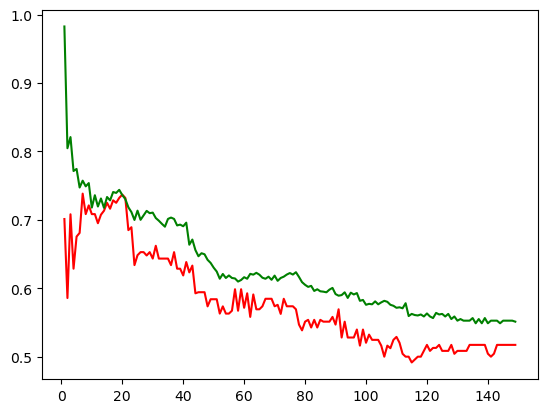

In [14]:
plt.plot(k,test_f1,color='red',label='test')
plt.plot(k,train_f1,color='green',label='train')

# hold out validation

In [15]:
data=pd.read_csv("data_cleaned.csv")


In [16]:
data_x=data.drop(['Survived'],axis=1)
data_y=data['Survived']

In [17]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_x=train_test_split(data_x,data_y,test_size=0.2,random_state=50,stratify=data_y)

In [18]:
train_x,val_x,train_y,val_y=train_test_split(train_x,train_y,test_size=0.2,random_state=51,stratify=train_y)


In [19]:
train_y.value_counts()/len(train_y)

0    0.616872
1    0.383128
Name: Survived, dtype: float64

In [20]:
val_y.value_counts()/len(val_y)

0    0.615385
1    0.384615
Name: Survived, dtype: float64

In [21]:
#k fold cross validation

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(data_x)
    

In [23]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,data_y,random_state=96,stratify=data_y)

In [24]:
from sklearn.neighbors import KNeighborsClassifier as KNN


In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNN(n_neighbors=3),X=train_x,y=train_y,cv=10)
score

C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

array([0.76119403, 0.74626866, 0.76119403, 0.7761194 , 0.65671642,
       0.80597015, 0.8358209 , 0.80597015, 0.81818182, 0.74242424])

In [26]:
score.mean()*100, score.std()*100

(77.09859791949344, 4.856044270804294)

In [27]:
def val_score(n_neighbors):
    avg=[]
    std=[]
    for i in n_neighbors:
        score=cross_val_score(KNN(n_neighbors=i),X=train_x,y=train_y,cv=10)
        avg.append(score.mean())
        std.append(score.std())
    return avg,std

In [34]:
n_neighbors=range(1,50)
mean,std=val_score(n_neighbors)



C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [35]:
mean,std

([0.7365897783808232,
  0.7515151515151516,
  0.7709859791949344,
  0.7755088195386703,
  0.7665535956580732,
  0.7710538218000904,
  0.781524197195839,
  0.7830393487109906,
  0.7680235187697874,
  0.784486657620986,
  0.7784486657620986,
  0.7874265038444143,
  0.7754183627317957,
  0.7874265038444144,
  0.7725011307100861,
  0.7814337403889642,
  0.7754635911352329,
  0.7844188150158299,
  0.7784486657620986,
  0.7754409769335143,
  0.7739258254183627,
  0.7754862053369516,
  0.781456354590683,
  0.7769335142469471,
  0.7829262777023971,
  0.7814337403889644,
  0.7844414292175486,
  0.7754862053369516,
  0.7709633649932158,
  0.7769561284486657,
  0.7724785165083672,
  0.7784486657620986,
  0.7709633649932157,
  0.7739484396200813,
  0.7709633649932156,
  0.7784712799638173,
  0.7724559023066485,
  0.7664631388511987,
  0.7680009045680688,
  0.7635232926277703,
  0.7605156037991858,
  0.7709859791949344,
  0.7650158299412031,
  0.7680235187697874,
  0.7590456806874718,
  0.765083672

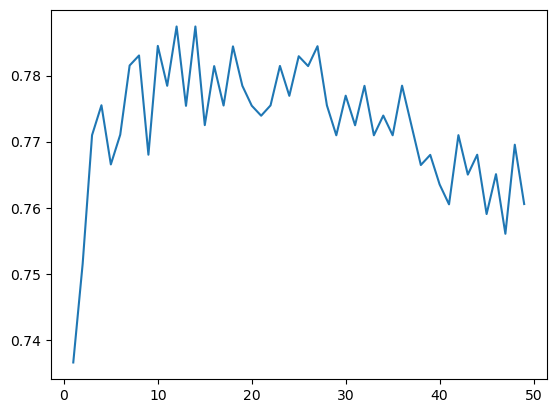

In [36]:
plt.plot(n_neighbors,mean)

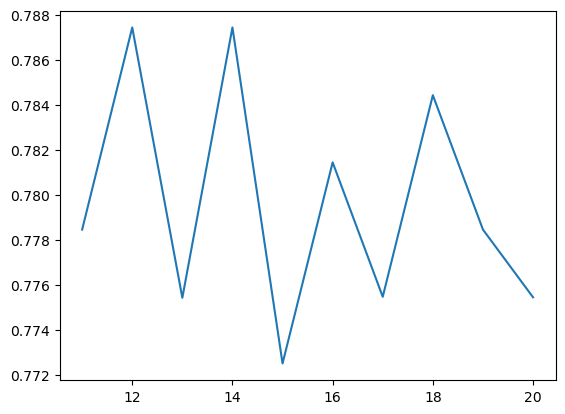

In [37]:
plt.plot(n_neighbors[10:20],mean[10:20])

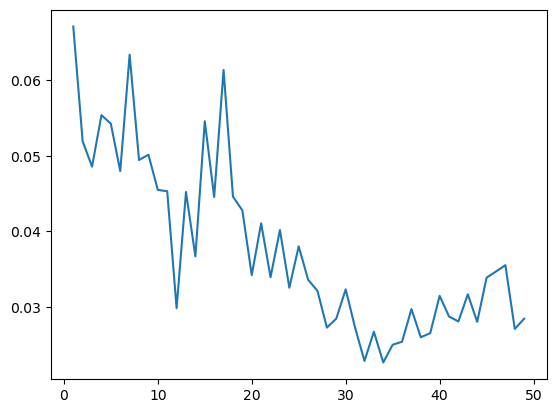

In [38]:
plt.plot(n_neighbors,std)

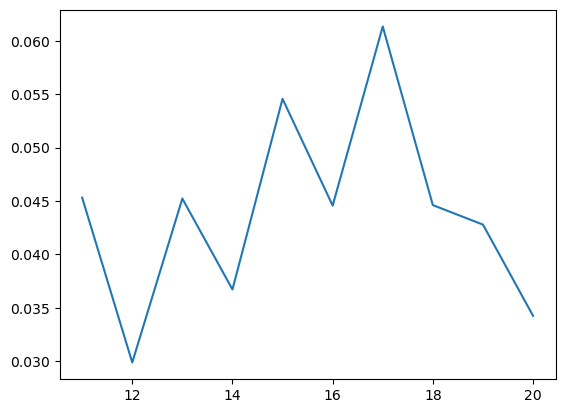

In [39]:
plt.plot(n_neighbors[10:20],std[10:20])

In [41]:
clf=KNN(n_neighbors=14)
clf.fit(train_x,train_y)
test_predict=clf.predict(test_x)
f1=clf.score(train_x,train_y)
f2=clf.score(test_x,test_y)
f1,f2

C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

(0.811377245508982, 0.8161434977578476)